In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
temp_hist = np.load('temperature_history.npy')

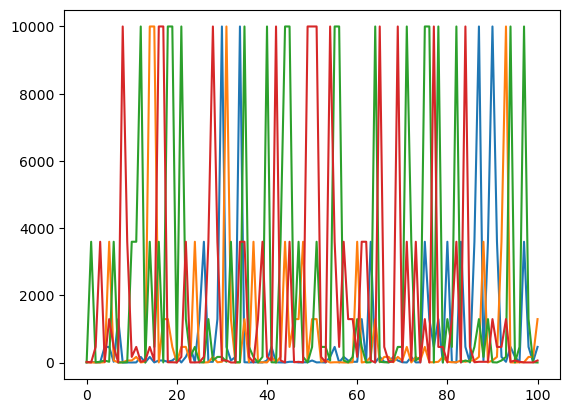

In [52]:
plt.plot(temp_hist[:, 0])
plt.plot(temp_hist[:, 1])
plt.plot(temp_hist[:, 2])
plt.plot(temp_hist[:, 3])
plt.show()

In [99]:
temp_hist = np.load('temp_rank0.npy')

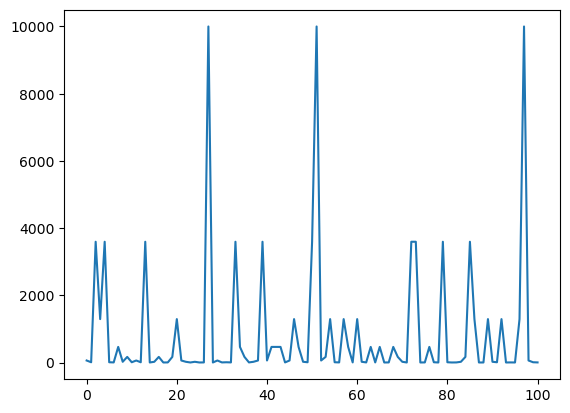

In [100]:
plt.plot(temp_hist[:, 4])
#plt.plot(temp_hist[:, 1])
#plt.plot(temp_hist[:, 2])
#plt.plot(temp_hist[:, 3])
plt.show()

In [10]:
acceptance = np.load('acceptance.npy')

In [11]:
# Compute different order exchange 
order_exchange = []
order_exchange_mean = []
for order in range(10):
    if order == 0:
        order_exchange.append(np.diag(acceptance,order))
    else:
        exchange = np.diag(acceptance,order) / np.diag(acceptance,-order)
        exchange[np.argwhere(np.isnan(exchange))] = 0
        order_exchange.append(exchange)
    order_exchange_mean.append(order_exchange[-1].mean(axis=0))


# Check all elements in the diagonal are 0
assert order_exchange[0].all() == 0

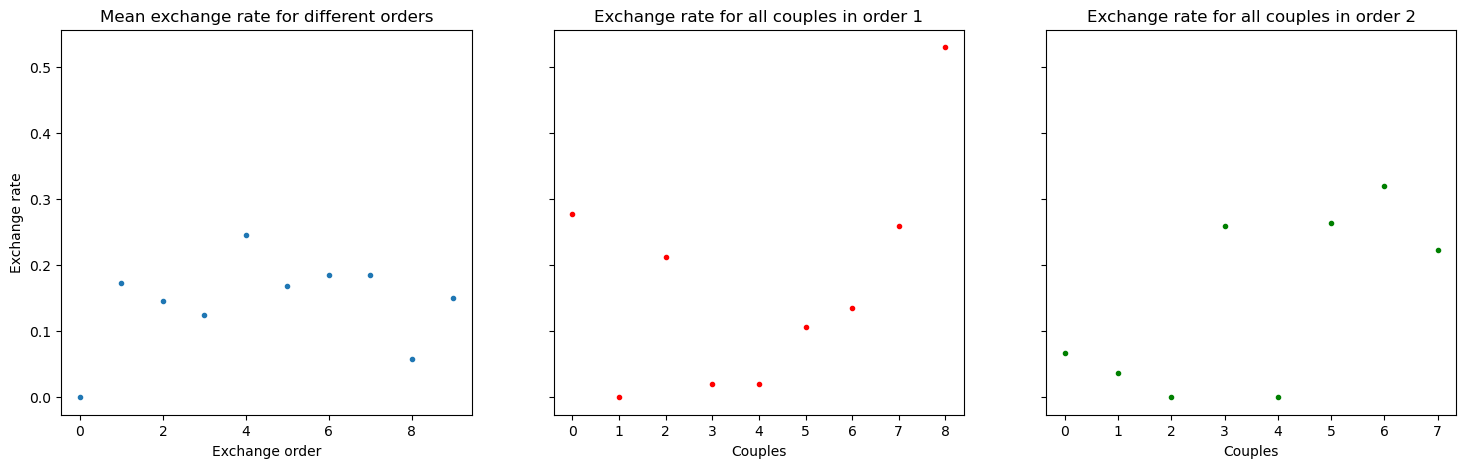

In [12]:
fig, ax = plt.subplots(1,3, figsize=(18,5), sharey=True)

ax[0].plot(order_exchange_mean, '.')
ax[0].set_title('Mean exchange rate for different orders')
ax[0].set_ylabel('Exchange rate')
ax[0].set_xlabel('Exchange order')

ax[1].plot(order_exchange[1], '.', c='r')
ax[1].set_title('Exchange rate for all couples in order 1')
ax[1].set_xlabel('Couples')


ax[2].plot(order_exchange[2], '.', c='g')
ax[2].set_title('Exchange rate for all couples in order 2')
ax[2].set_xlabel('Couples')


plt.show()

In [58]:
acceptance

array([[ 0., 32., 23., 36., 33., 28., 41., 25., 37., 27.],
       [47.,  0., 30., 19., 31., 38., 32., 23., 27., 43.],
       [45., 43.,  0., 27., 26., 32., 50., 31., 38., 37.],
       [55., 55., 52.,  0., 25., 26., 26., 50., 24., 22.],
       [48., 47., 43., 50.,  0., 31., 31., 31., 34., 29.],
       [40., 43., 49., 54., 49.,  0., 31., 25., 28., 57.],
       [78., 50., 64., 50., 52., 47.,  0., 27., 34., 26.],
       [50., 54., 52., 53., 56., 53., 52.,  0., 27., 32.],
       [53., 55., 53., 50., 46., 47., 47., 54.,  0., 26.],
       [40., 45., 50., 56., 53., 59., 47., 63., 51.,  0.]])

[]

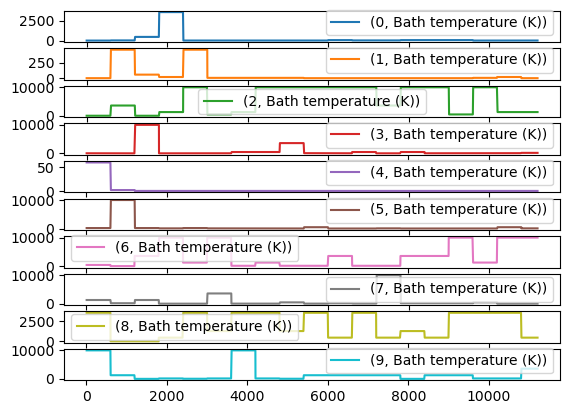

In [5]:
df = pd.read_csv(f'state.csv')
#df.plot.hist(column=['Total Energy (kJ/mole)'], by='Number Replica', bins=10, figsize=(10,80), sharey=True)
#df.plot.hist(column=['Potential Energy (kJ/mole)'], by='Number Replica', figsize=(10,80), sharex=True, sharey=True)
df.plot(column=['Bath temperature (K)'], by='Number Replica')
plt.plot()

In [6]:
per_replica_datasets = []
for replica_idx in range(10):
    per_replica_datasets.append(df[df['Number Replica'] == replica_idx])

<AxesSubplot:xlabel='Time (ps)'>

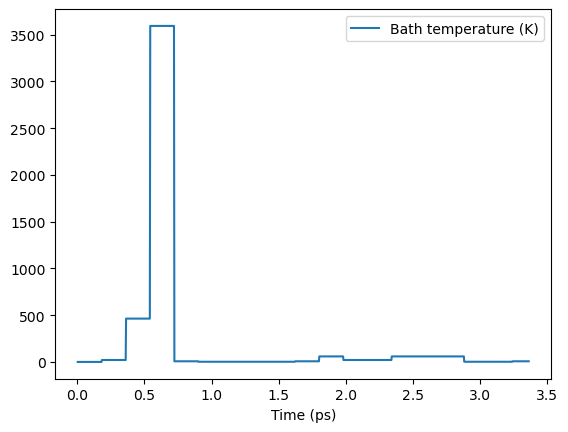

In [7]:
per_replica_datasets[0].plot('Time (ps)', 'Bath temperature (K)')

In [9]:
df

,Number Replica,Time (ps),Potential Energy (kJ/mole),Kinetic Energy (kJ/mole),Total Energy (kJ/mole),Bath temperature (K),Box Volume (nm^3),Elapsed Time (s),Speed (ns/day)
0,0,0.003,0.031258,0.000929,0.032187,1.000000,8.0,0.000222,0.0
1,1,0.003,0.031263,0.002593,0.033856,2.782559,8.0,0.000522,0.0
2,2,0.003,0.031271,0.007230,0.038502,7.742637,8.0,0.000809,0.0
3,3,0.003,0.031285,0.020143,0.051428,21.544347,8.0,0.001093,0.0
4,4,0.003,0.031309,0.056087,0.087396,59.948425,8.0,0.001379,0.0
...,...,...,...,...,...,...,...,...,...
11205,4,3.363,0.251346,0.055979,0.307325,1.000000,8.0,20.737103,14.0
11206,9,3.363,1.813669,9.359914,11.173583,3593.813664,8.0,20.737438,14.0
11207,3,3.363,0.431970,0.020046,0.452016,166.810054,8.0,20.737732,14.0
11208,6,3.363,1.329085,0.433646,1.762731,10000.000000,8.0,20.738048,14.0
